In [1]:
import SFCPurifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nmslib 
from tqdm import tqdm

In [2]:
drawer = SFCPurifier.Drawer()
clus = SFCPurifier.AutoGater()
pur = SFCPurifier.Purifier()

In [3]:
df_ = pd.read_csv(r'C:\PLT\Plt_200k_h2.csv', delimiter=';')
x_DB, y_DB = np.array(df_)[:, 5 + 4: 4 + 81], np.array(df_)[:, :4]

In [4]:
# paths = [
#     r"C:\20240607\plt_nat_cen",
#     r"C:\20240607\plt_agr_2min",
#     r"C:\20240607\plt_agr_4min",
#     r"C:\20240607\plt_agr_6min",
#     r"C:\20240607\plt_agr_8min",
#     r"C:\20240607\plt_agr_10min"
# ]

# paths = [
#     r'D:\20241114\1to4 serial\plt_nat_1_4_speed10',
#     r'D:\20241114\1to4 serial\plt_agr_1_speed10',
#     r'D:\20241114\1to4 serial\plt_agr_2_speed10']
paths = [
    r'C:\20241114\1to8 seria\plt_nat_speed10',
    r'C:\20241114\1to8 seria\plt_agr_1_speed10',
    r'C:\20241114\1to8 seria\plt_agr_2_speed10']

In [5]:
angle_range = np.array(range(5,81))
pltSolver = SFCPurifier.InverseSpheresSolver()
mf = pltSolver.weightM(angle_range)
pltSolver.initModel((x_DB * mf)[:,5:] , y_DB, space = 'l2')

In [6]:
for path in tqdm(paths):
    df_exp = pd.read_csv(path+r'\plt.csv', delimiter=';')

    plt_exp = np.array(df_exp)[:,1:]* mf
    plt_res = pltSolver.KNNFit(plt_exp[:,5:])
    plt_db = x_DB[plt_res[1]] * mf

    l2_norm = np.sum((plt_exp[:,:5]-plt_db[:,:5])**2, axis=1) ** 0.5
    l2_rel = np.sum((plt_exp[:,:5]-plt_db[:,:5])**2, axis=1) ** 0.5 /  np.sum((plt_db[:,:5])**2, axis=1) ** 0.5
    int_th = np.sum(plt_db[:,:5], axis = 1)
    int_exp= np.sum(plt_exp[:,:5], axis = 1)

    df_res = pd.DataFrame()
    df_res['l2_norm'] = l2_norm
    df_res['l2_rel'] = l2_rel
    df_res['int_5_10_th'] = int_th
    df_res['int_5_10_exp'] = int_exp

    df_res.to_csv(path + '\ints_results.csv', sep=';')
    


    

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [01:38<00:00, 32.96s/it]


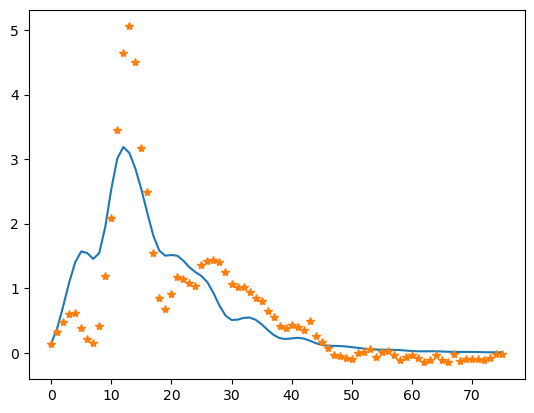

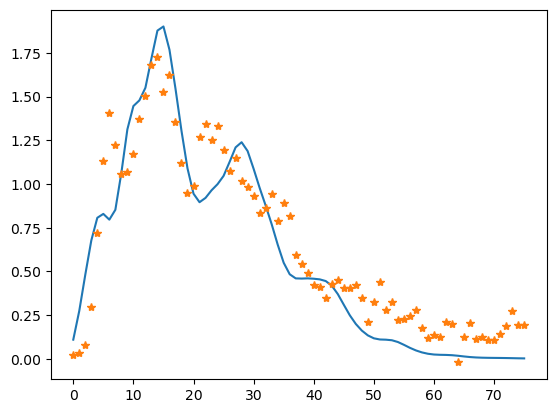

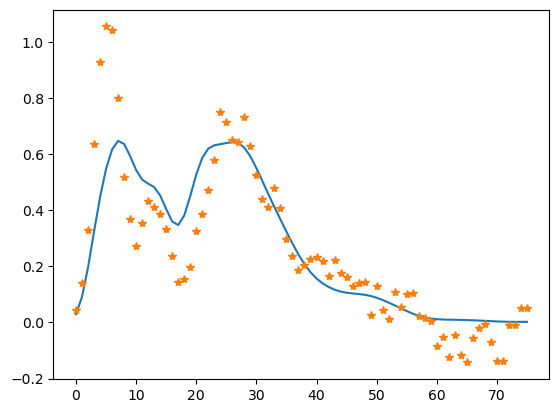

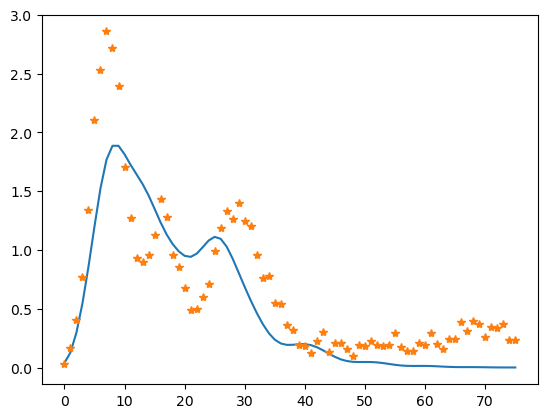

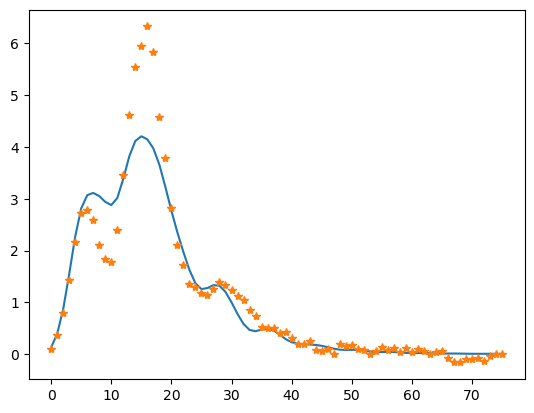

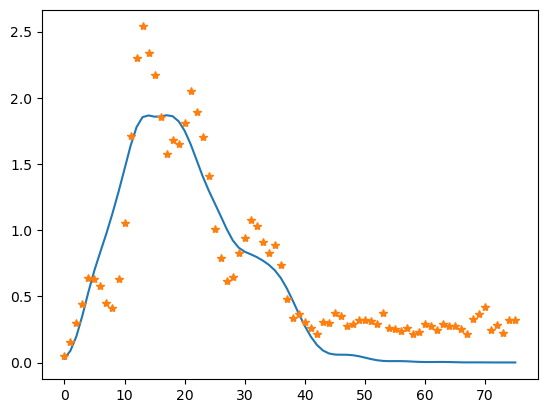

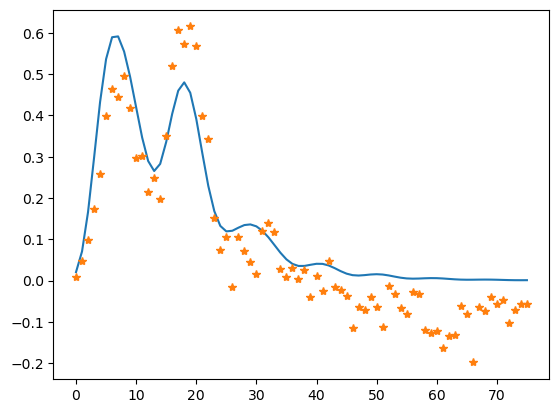

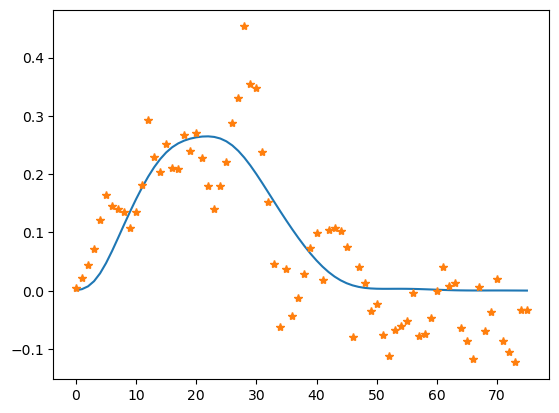

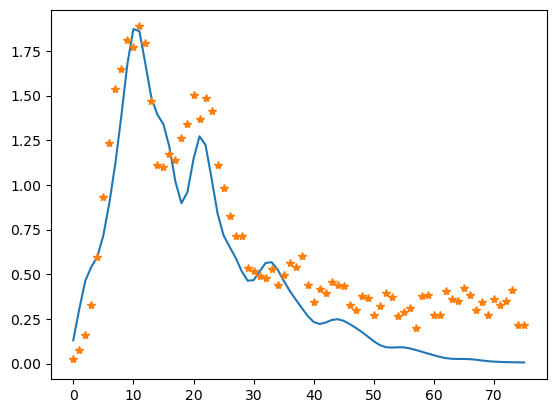

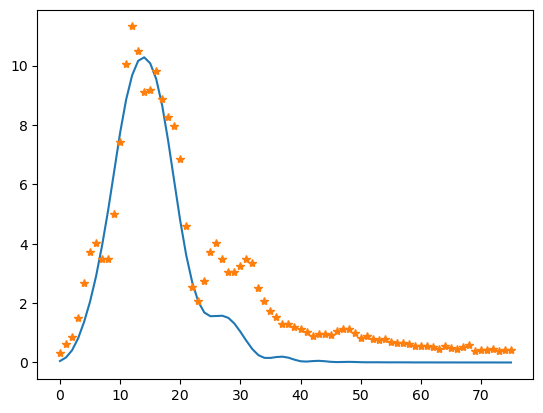

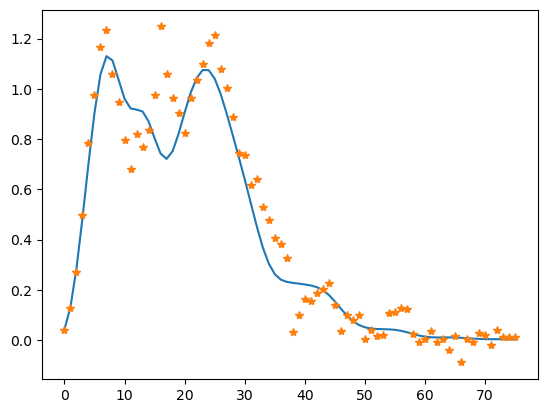

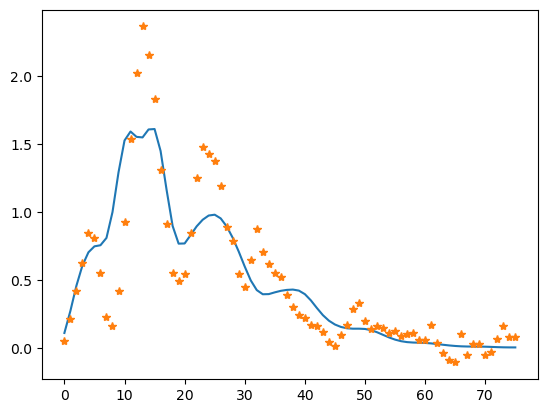

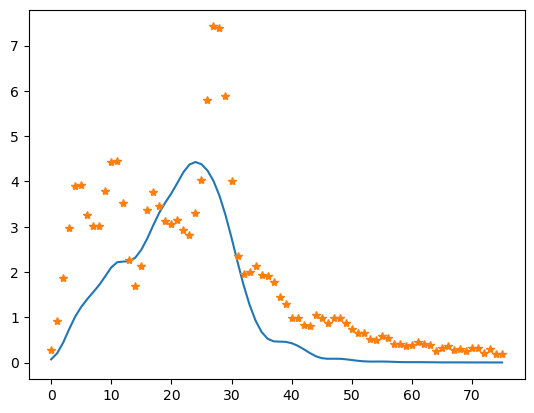

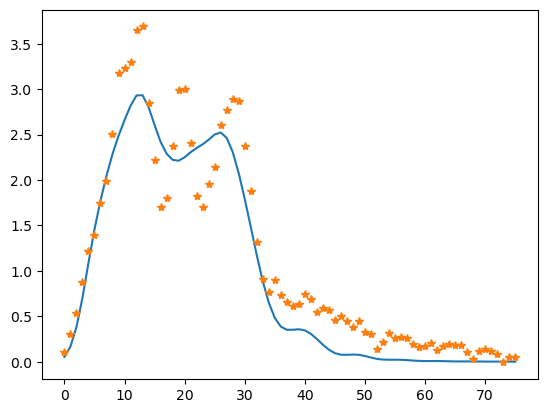

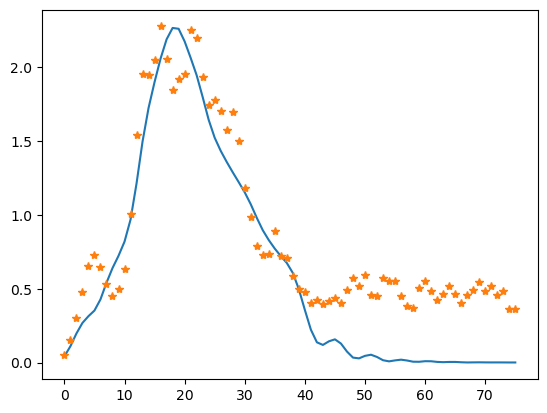

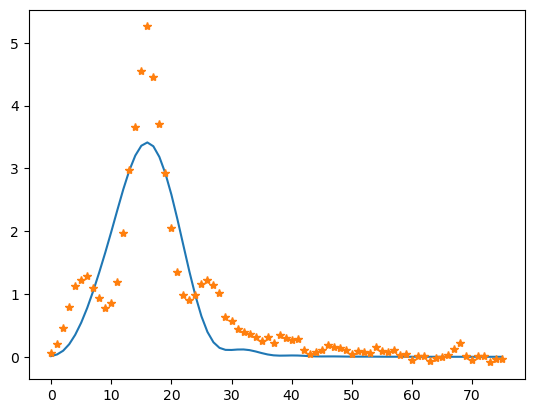

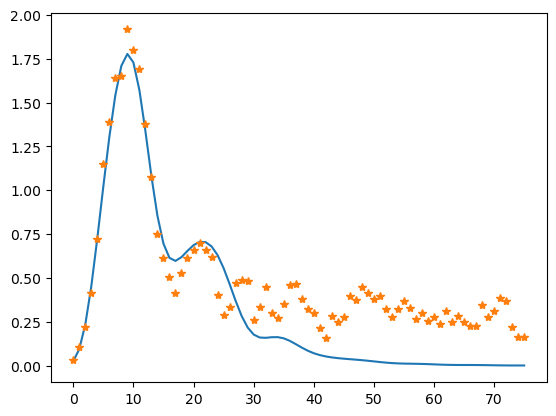

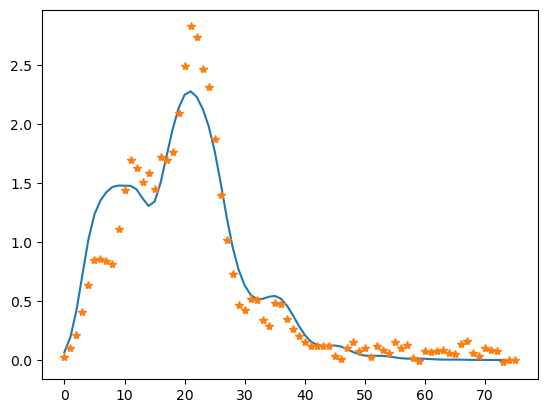

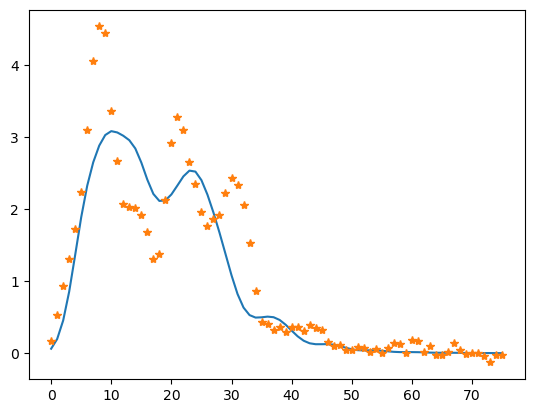

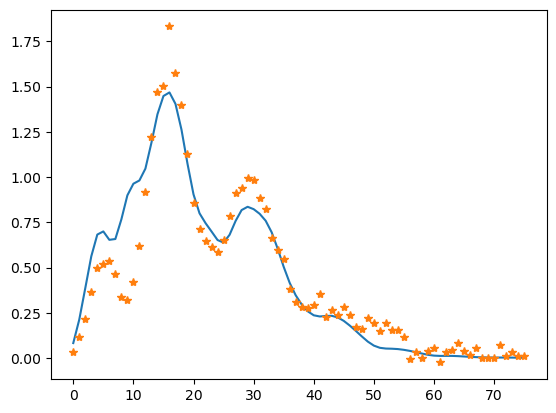

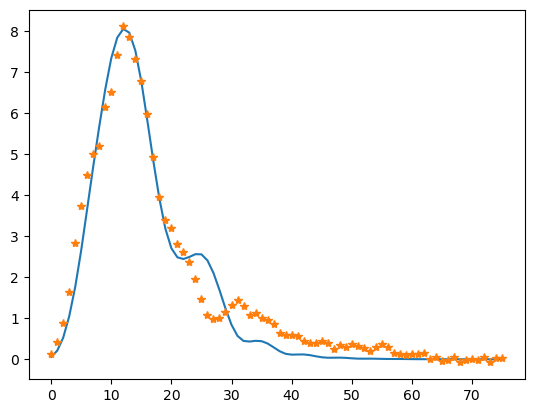

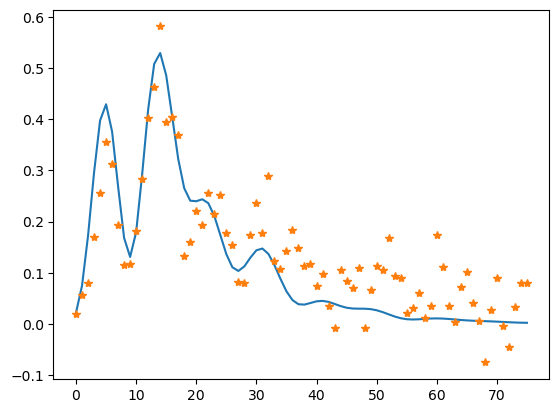

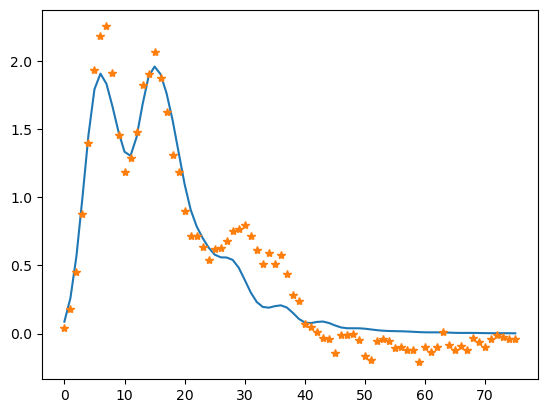

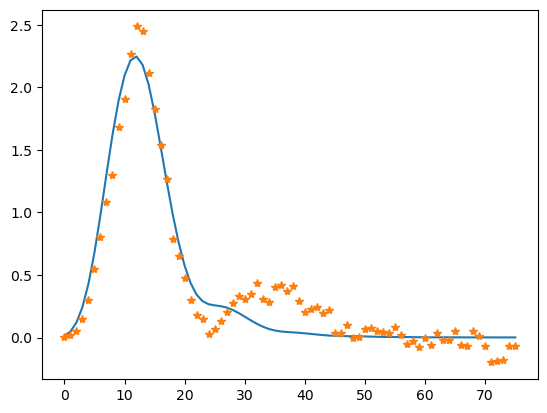

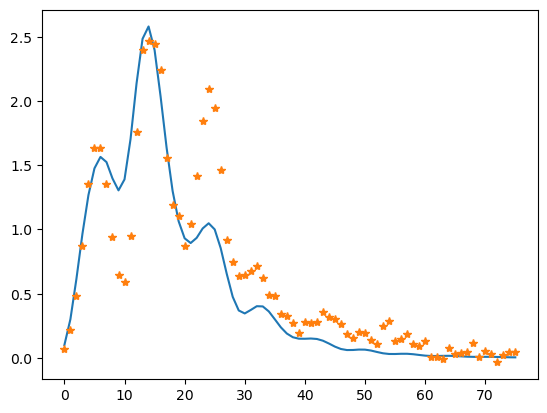

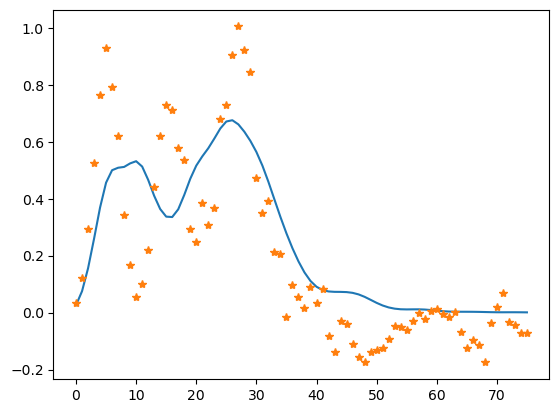

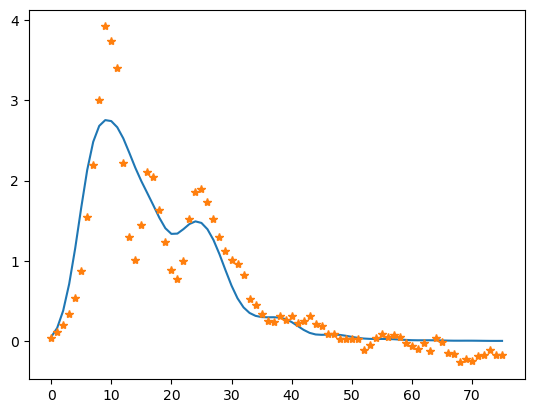

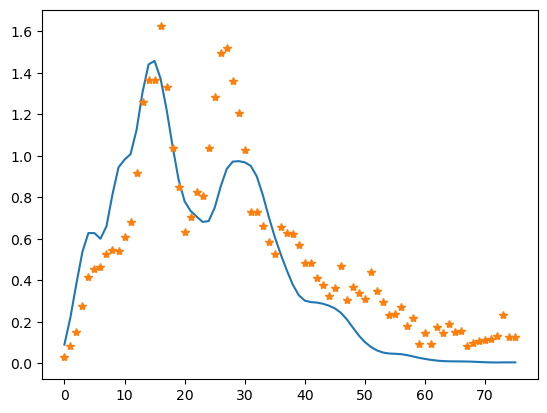

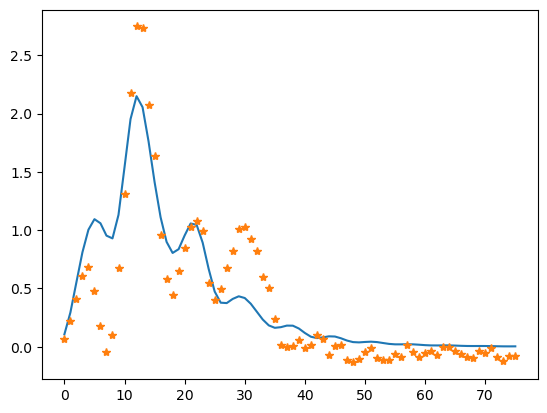

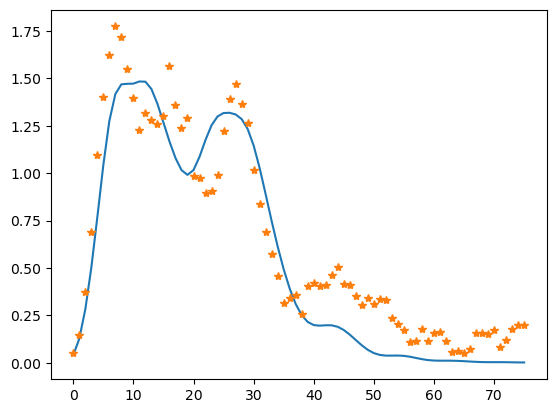

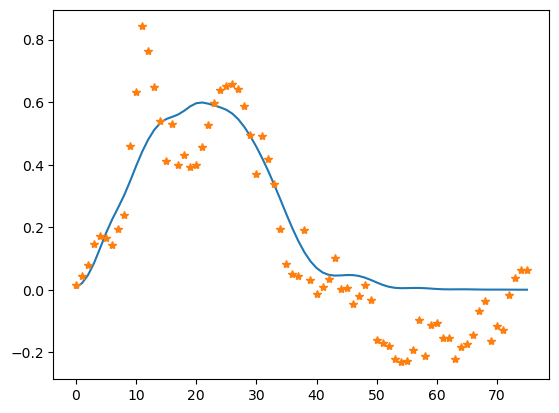

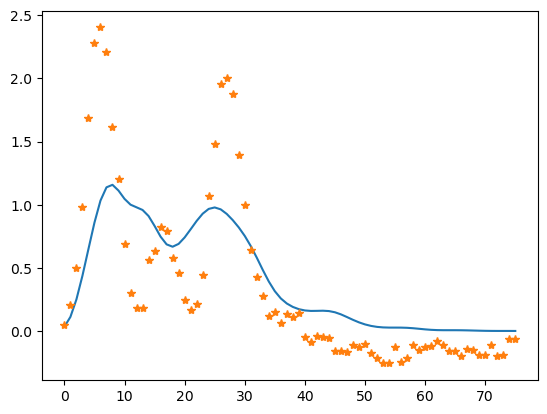

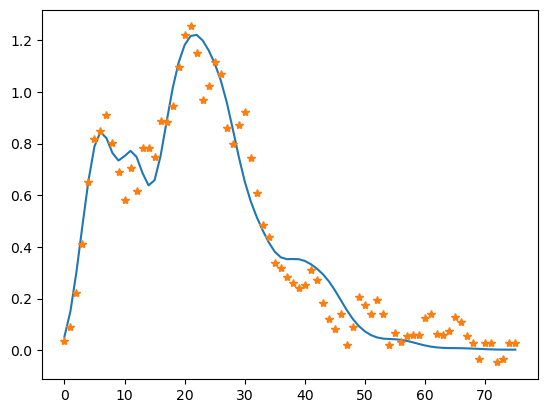

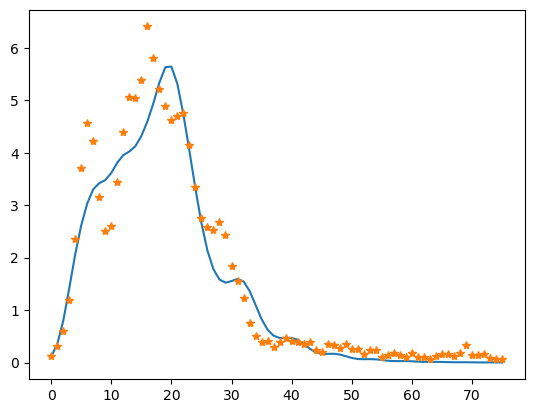

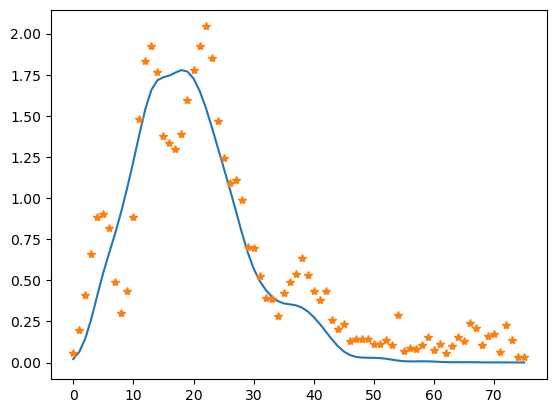

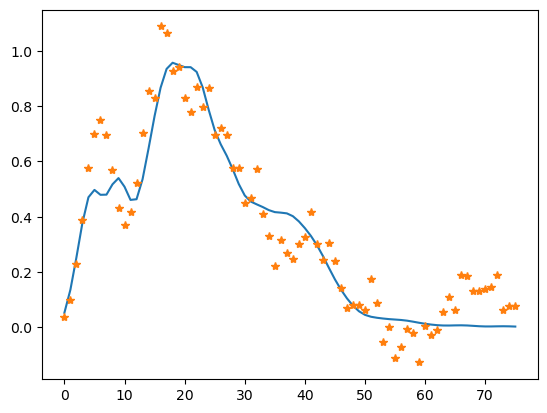

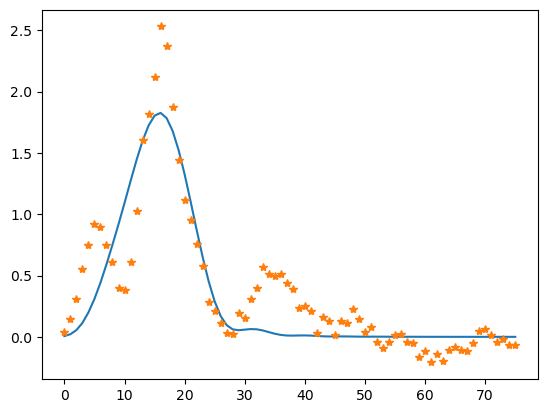

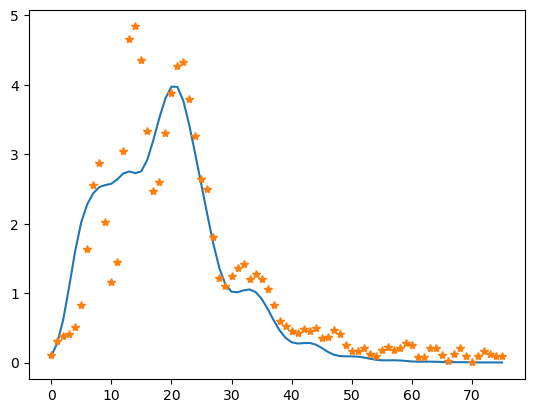

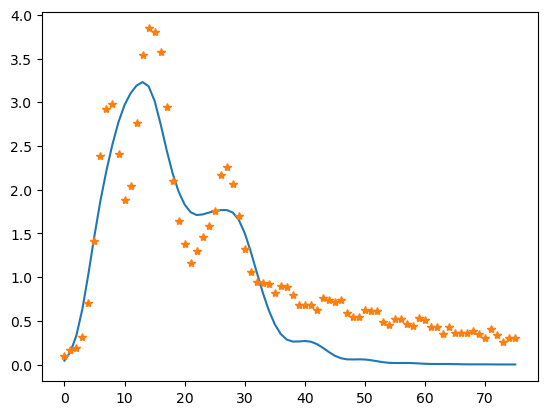

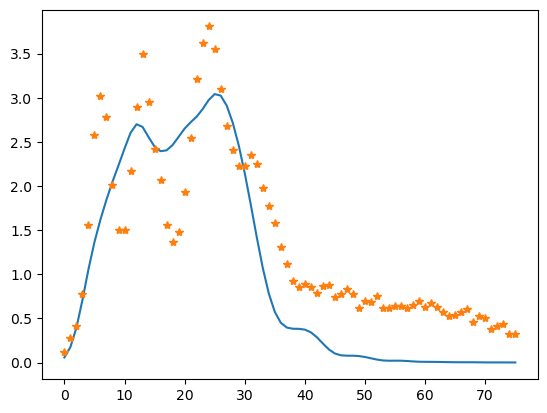

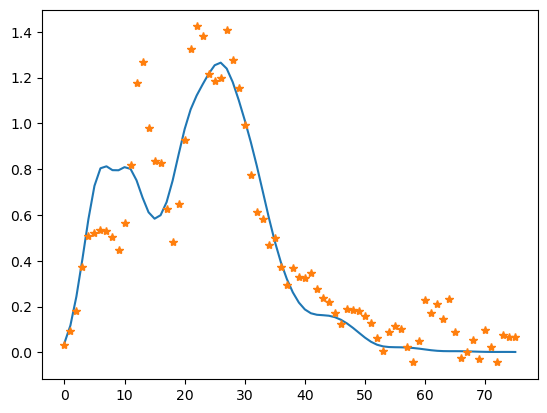

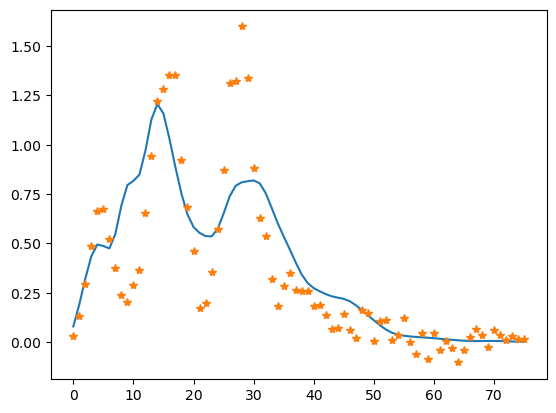

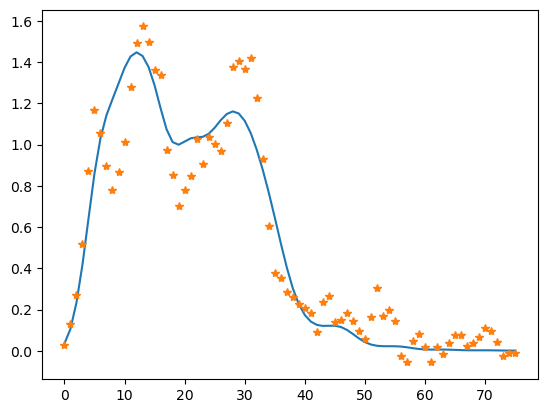

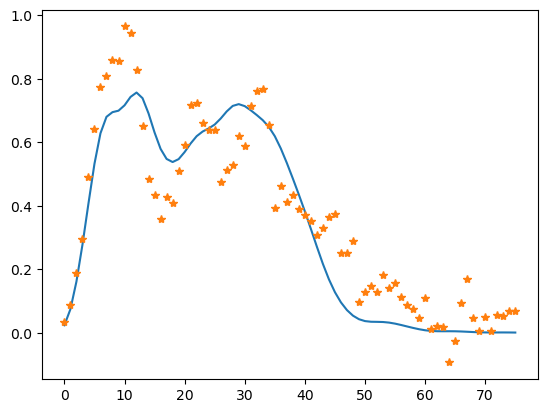

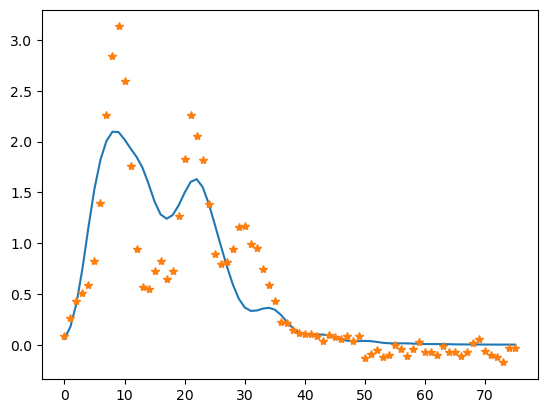

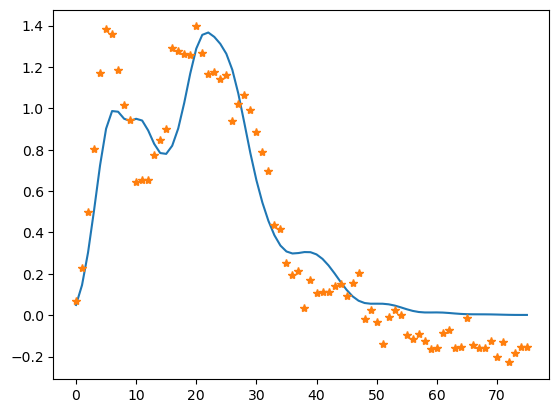

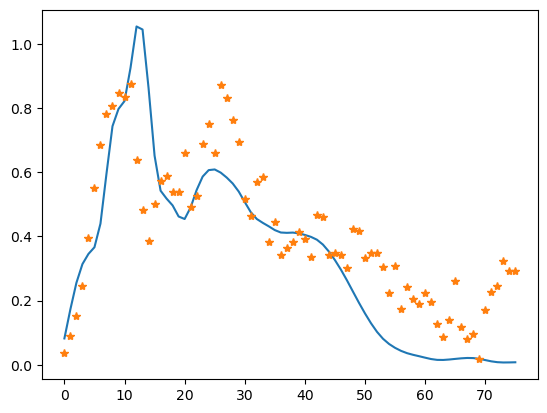

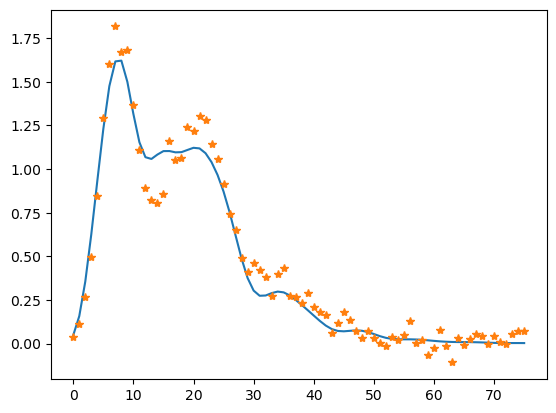

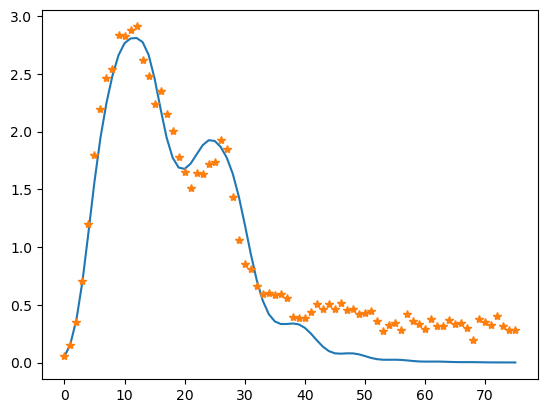

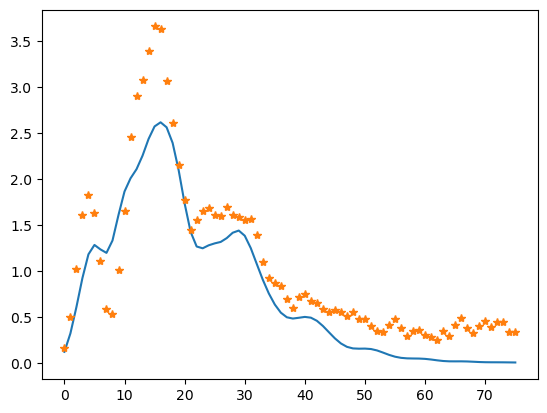

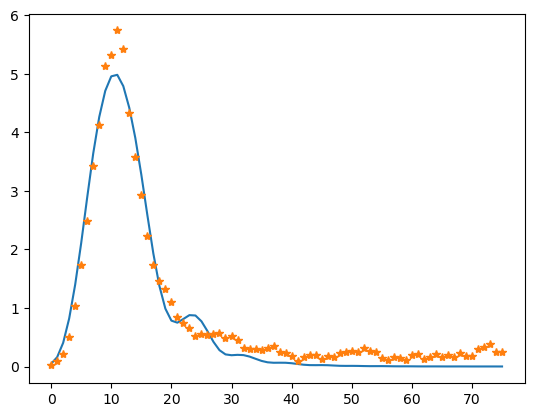

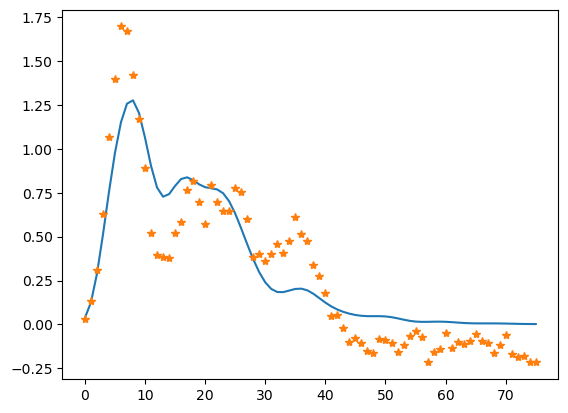

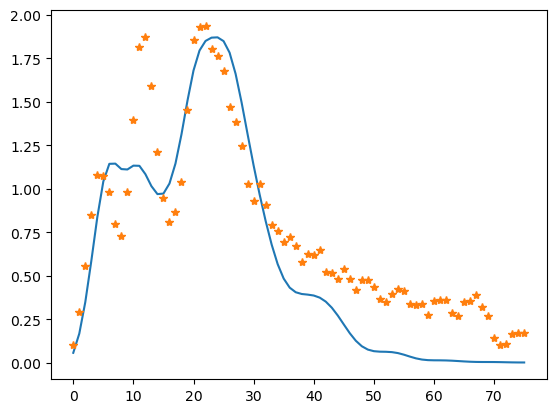

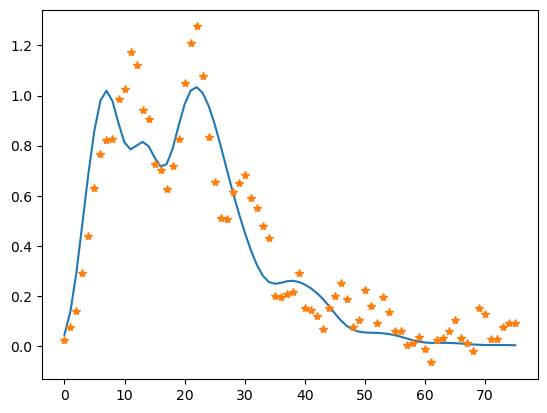

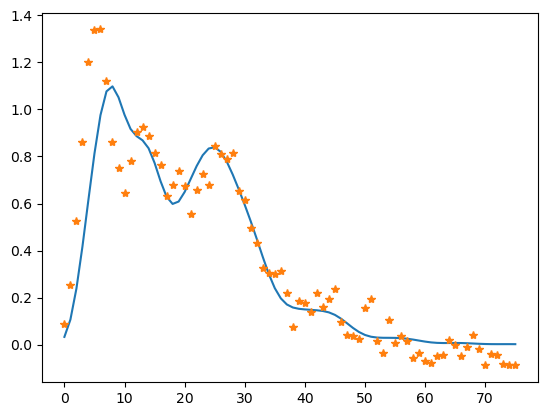

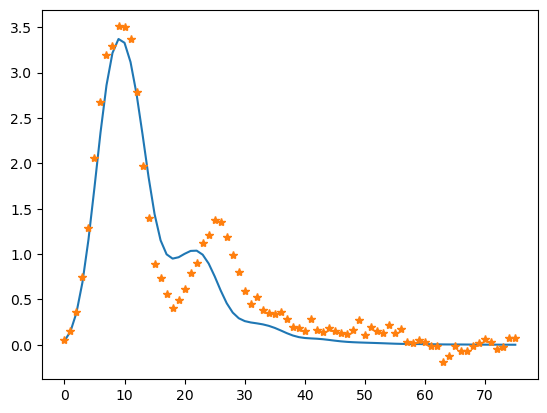

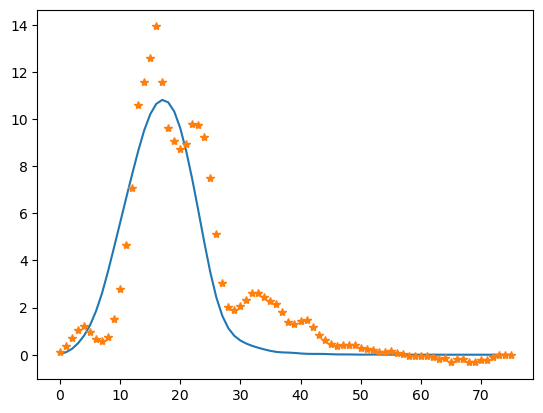

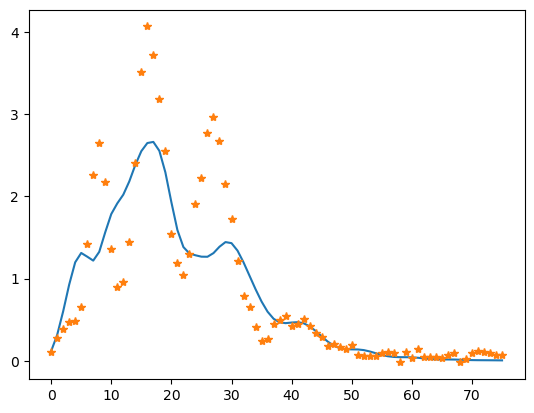

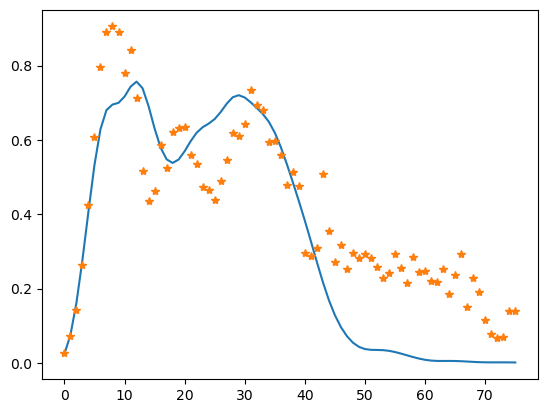

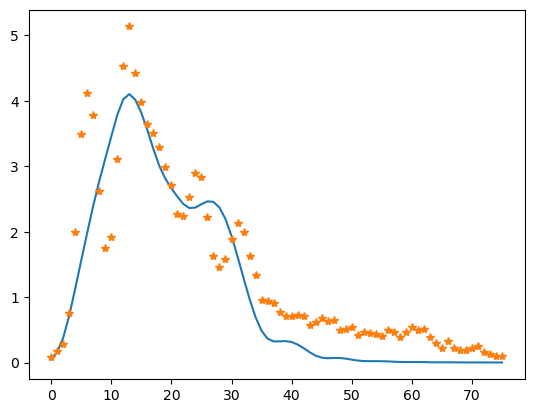

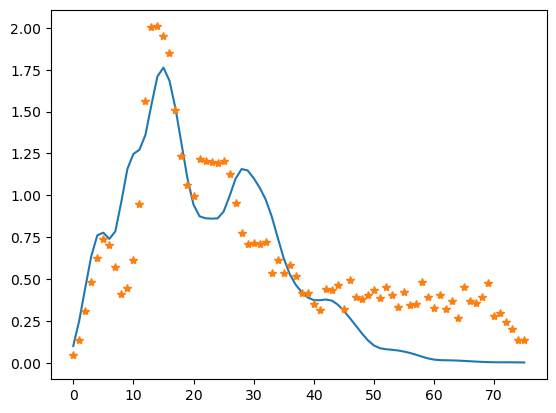

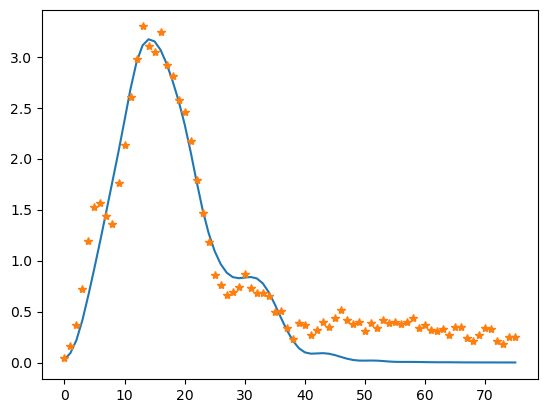

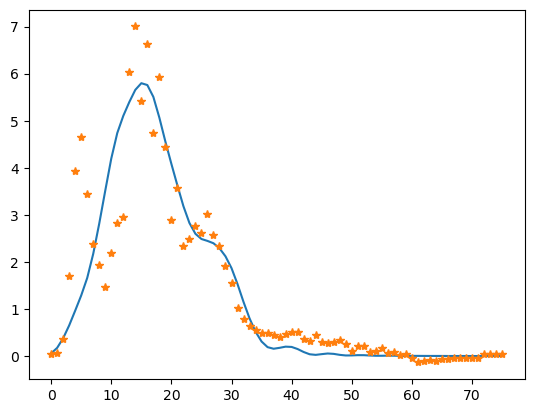

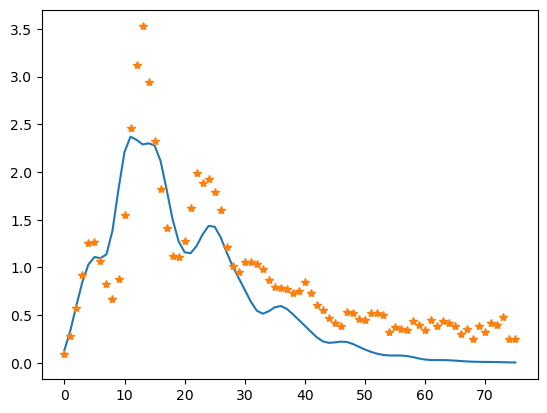

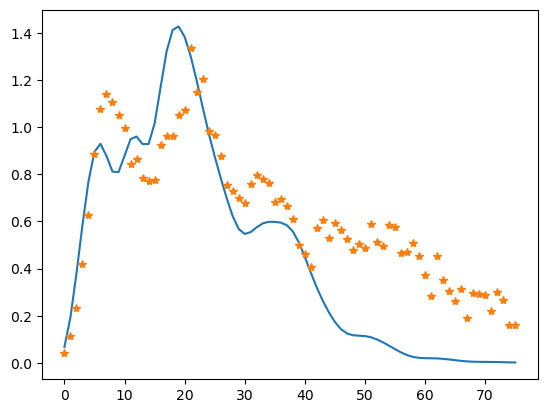

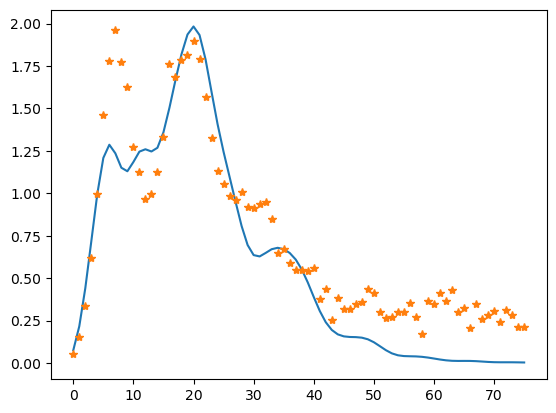

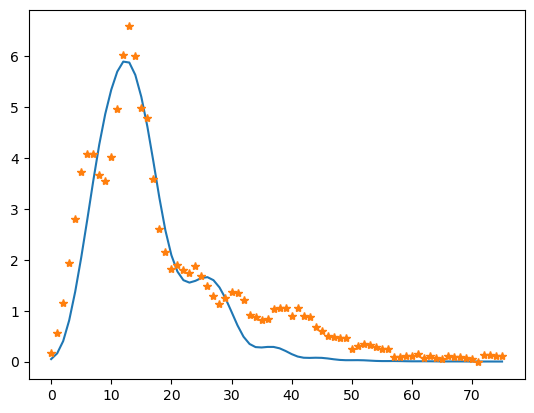

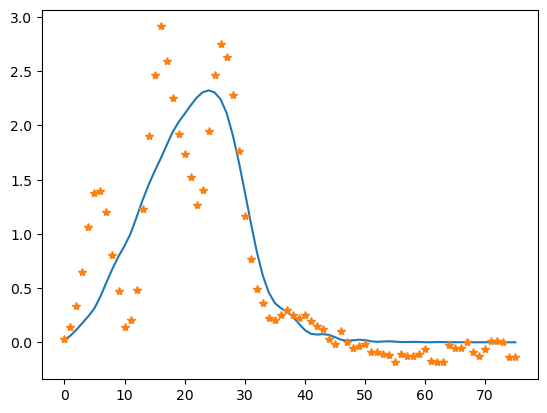

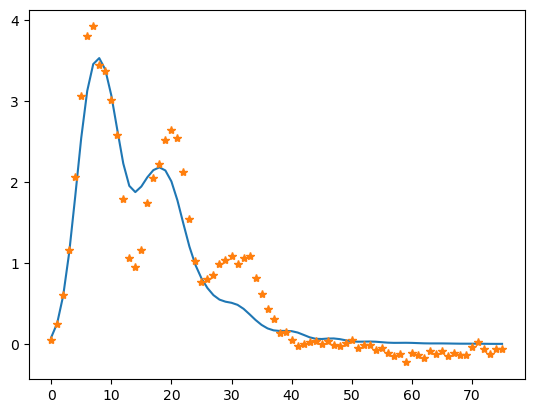

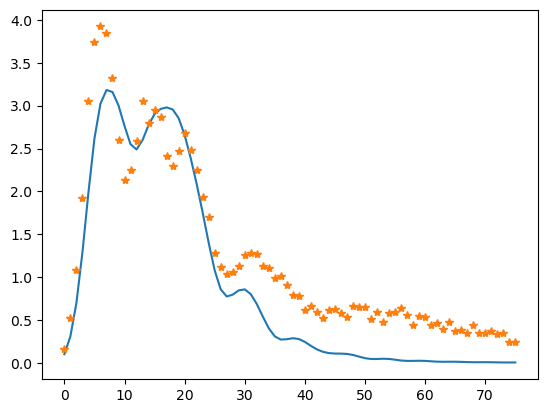

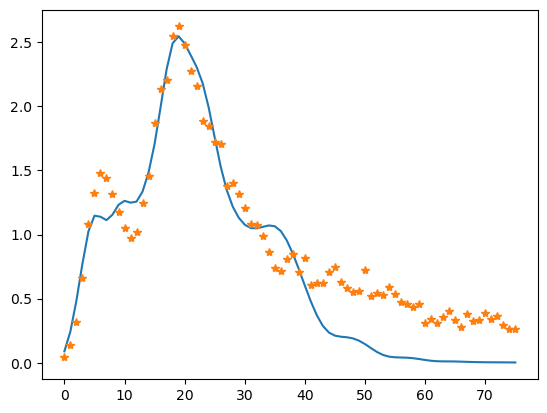

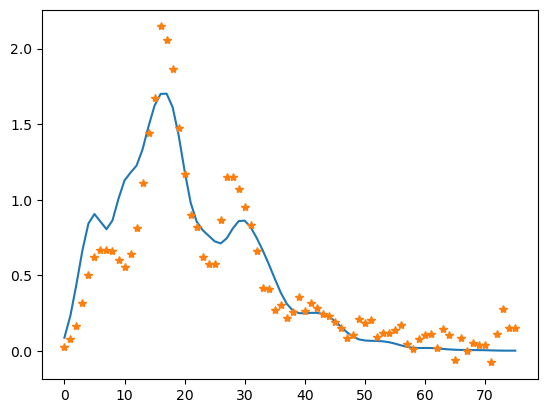

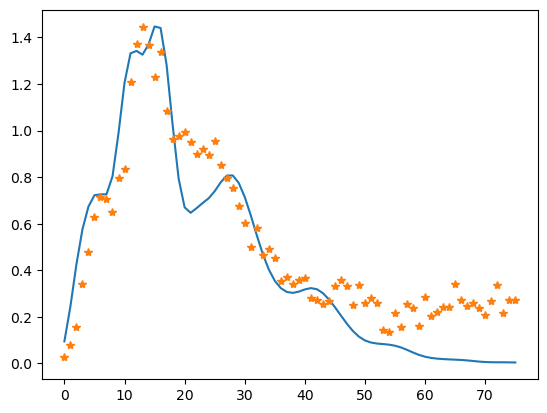

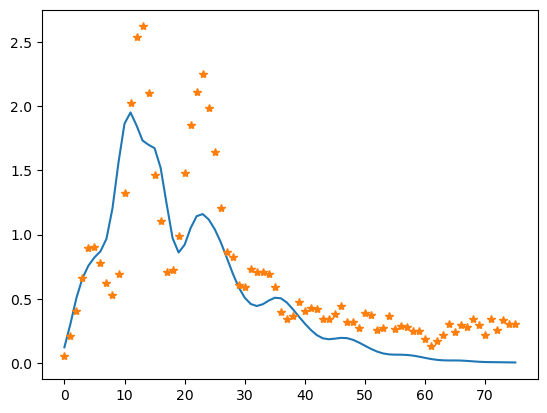

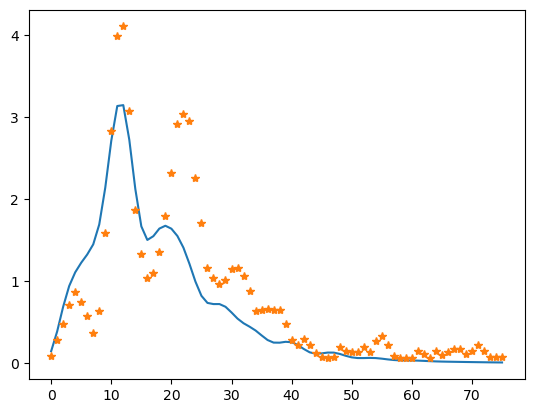

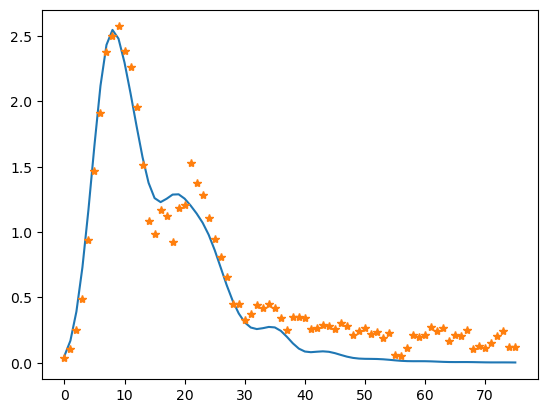

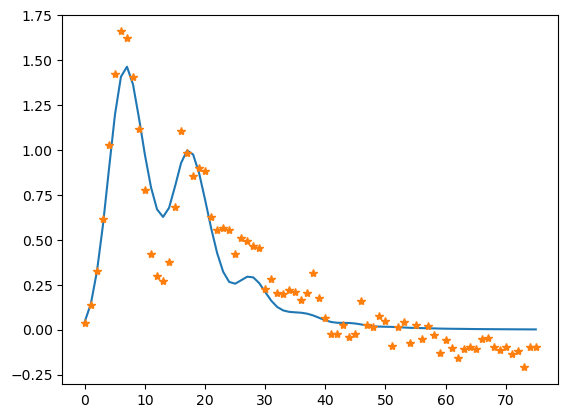

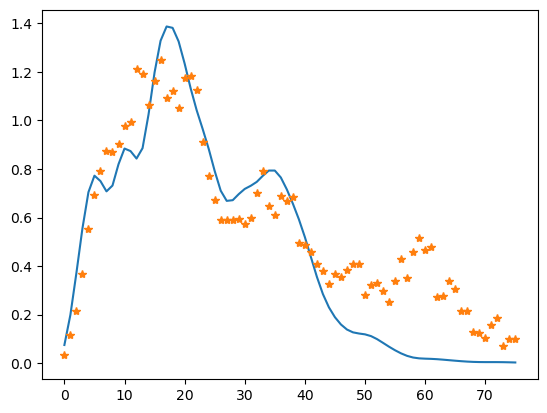

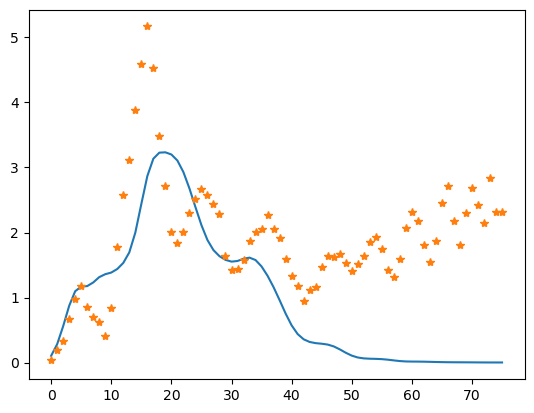

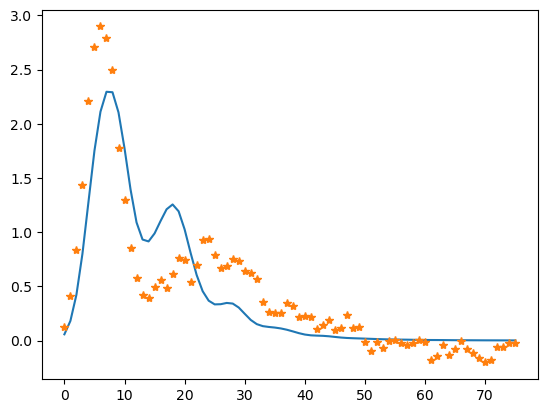

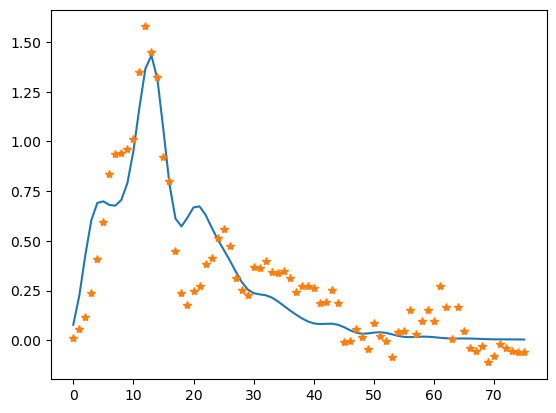

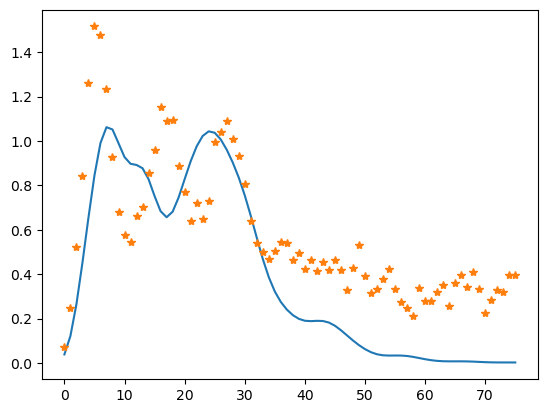

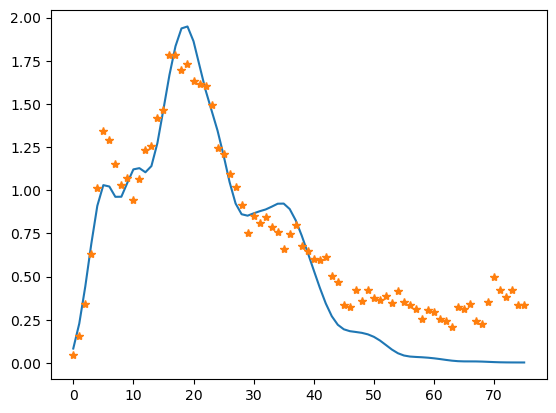

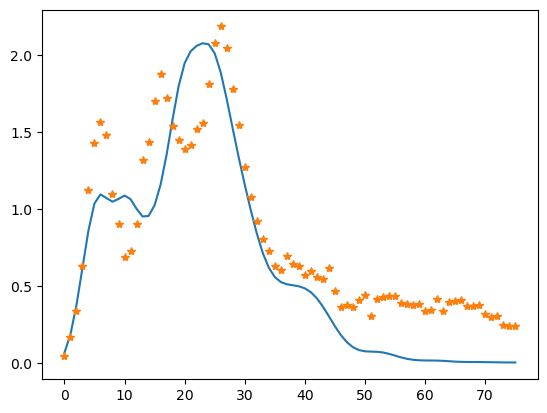

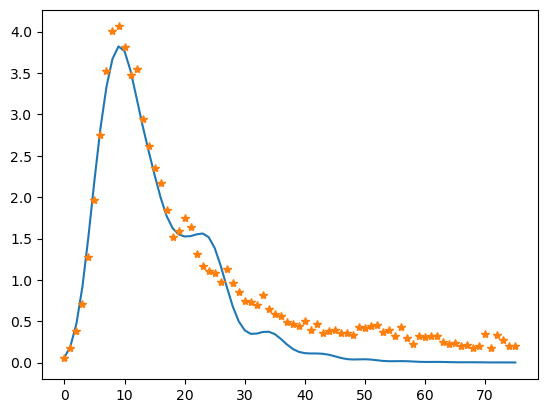

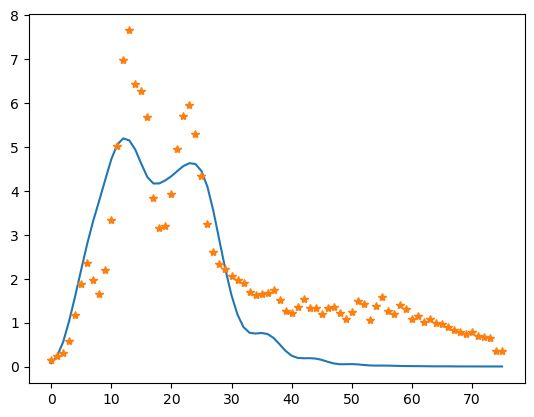

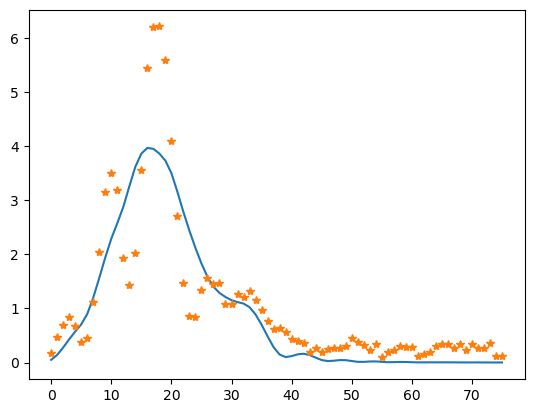

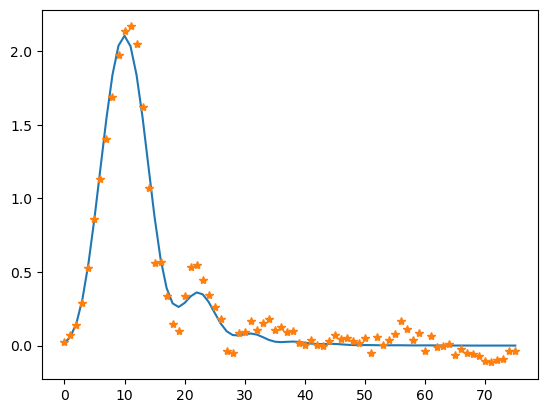

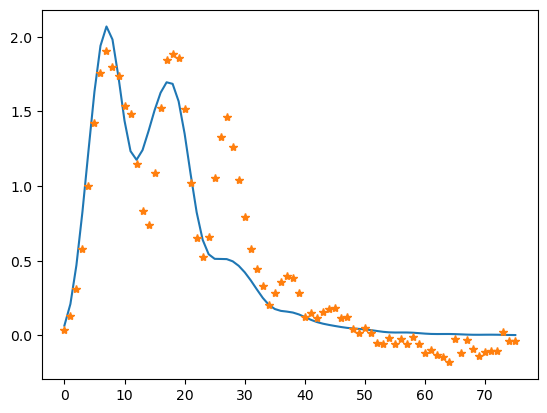

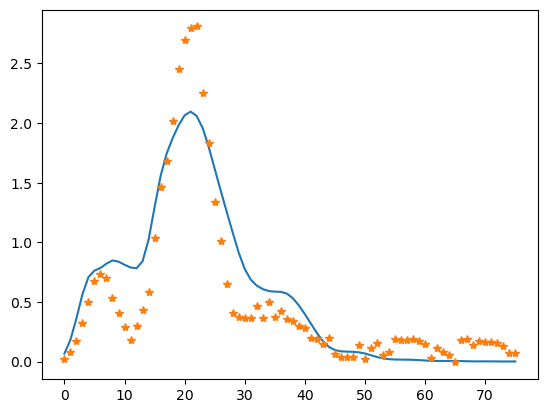

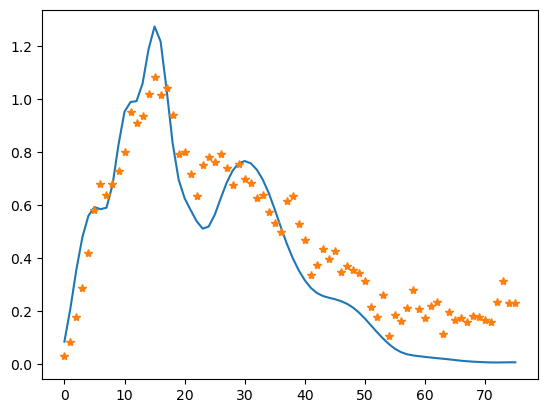

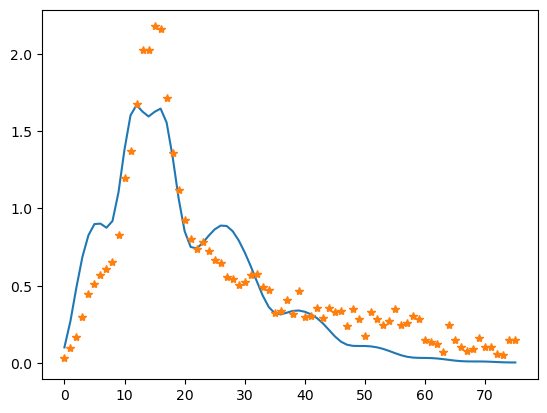

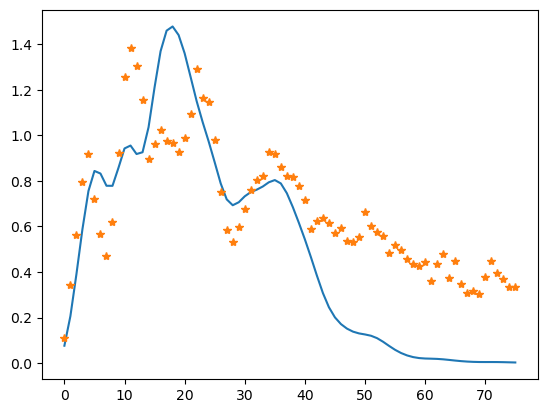

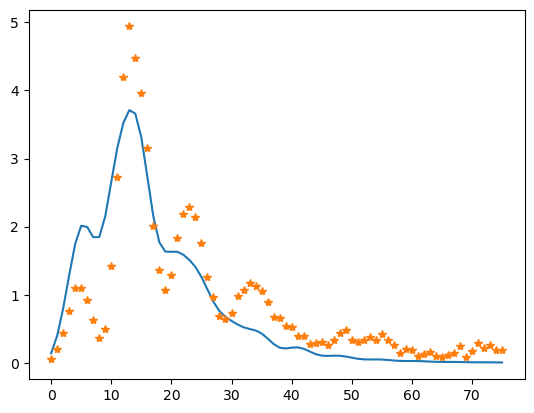

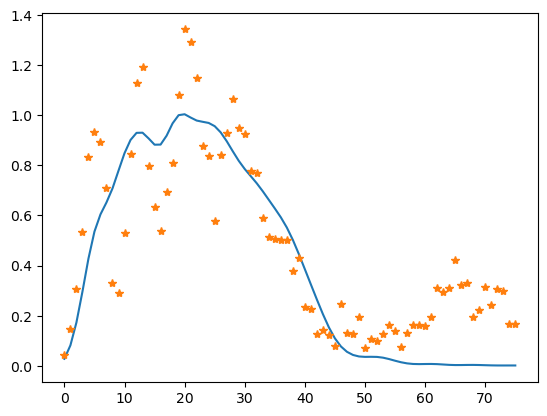

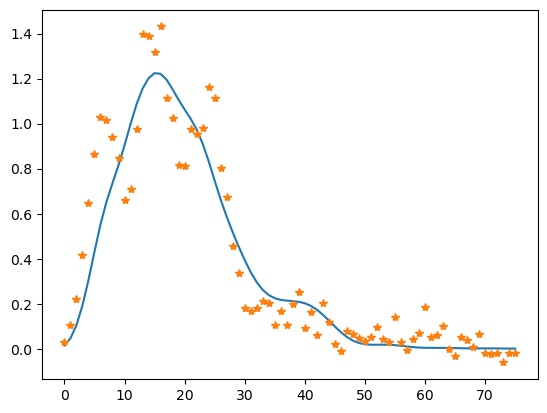

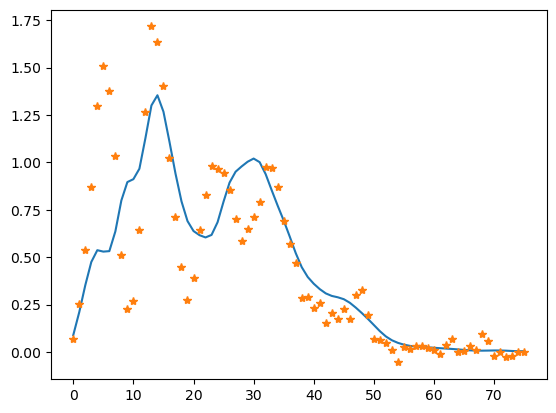

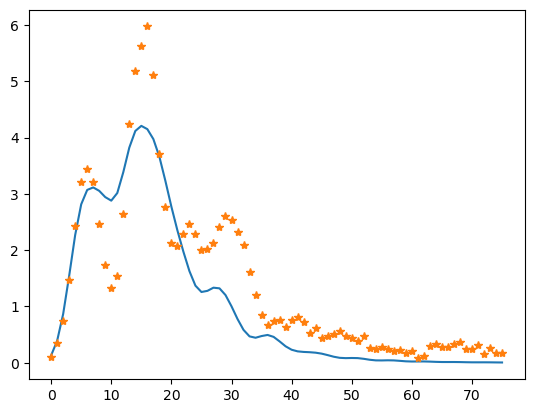

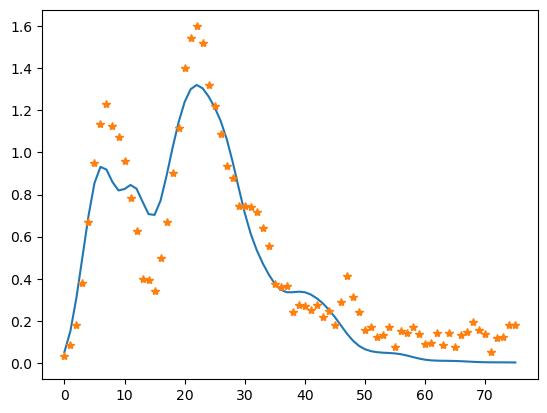

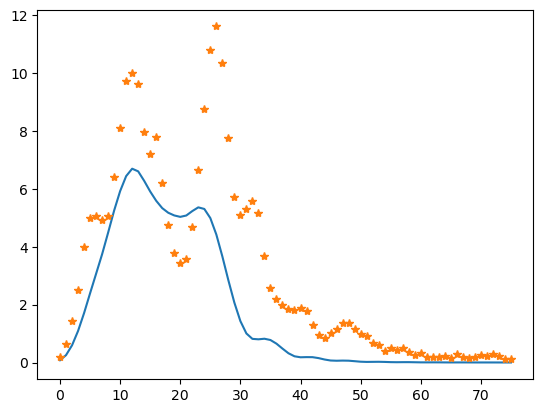

In [9]:
for i in range(100):
    plt.plot(plt_db[i])
    plt.plot(plt_exp[i], '*')
    plt.show()